In [2]:
pip install pycaret

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Using cached plac-1.1.3-py2.py3-none-any.whl (20 kB)
  Using cached catalogue-1.0.0-py2.py3-none-any.whl (7.7 kB)


You should consider upgrading via the 'D:\Anaconda3\python.exe -m pip install --upgrade pip' command.



  Created wheel for pyod: filename=pyod-0.8.5-py3-none-any.whl size=112042 sha256=7acecfcc4391e6877c18916de6869a9ce6e452b701dfda3601020aa087783e2a
  Stored in directory: c:\users\vineet pc\appdata\local\pip\cache\wheels\9b\11\7b\ddd0bd17bf088e6d1d670031f28b879e92ef1b741e322447af
  Created wheel for umap-learn: filename=umap_learn-0.4.6-py3-none-any.whl size=67957 sha256=0cbda87747d193c825a077ec80f4a6dc1a0595c202cc50f06105d733a7efb511
  Stored in directory: c:\users\vineet pc\appdata\local\pip\cache\wheels\9c\18\d0\2bcf7df75d19c6ca6ff8097b12abd4c46879e9a8275e93e651
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68727 sha256=0d65c82158ecd8e2d53690e13e7e1c60a0db4d4ec4f0fd27c52dede644f39488
  Stored in directory: c:\users\vineet pc\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434679 sha256=0405078fd5c6dcdf8ccdccbe737bdfebdea466f474b4a46535e86b7ab

In [3]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1

In [4]:
from pycaret.regression import *

In [5]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [6]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4165.9663,33302032.0000,5770.7915,0.8011,0.4683,0.4153
1,4503.7354,43746476.0000,6614.1118,0.7456,0.5633,0.4217
2,3880.5542,31795148.0000,5638.7188,0.5974,0.7645,0.4396
3,3747.6445,26805302.0000,5177.3838,0.7762,0.5015,0.5175
4,4471.0435,43410540.0000,6588.6675,0.6771,0.5224,0.3767
5,4182.7549,36166332.0000,6013.8452,0.7674,0.7416,0.4320
6,4081.1011,39192580.0000,6260.3979,0.7333,0.6434,0.4241
7,4928.1533,46415036.0000,6812.8579,0.7448,0.5887,0.4137
8,4609.3145,40370356.0000,6353.7671,0.7392,0.5686,0.5111
9,4665.8638,42596796.0000,6526.6221,0.7256,0.8131,0.4802


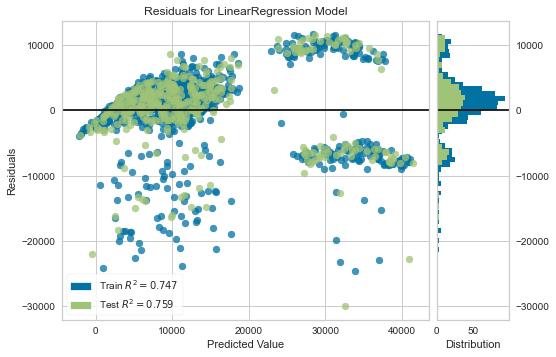

In [7]:
plot_model(lr)

# Experiment 2

In [17]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [33]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2822.1755,19702792.0000,4438.7827,0.8823,0.3794,0.3034
1,3255.4146,30690166.0000,5539.8706,0.8216,0.4358,0.3160
2,2841.6118,23057762.0000,4801.8496,0.7081,0.6014,0.3606
3,2825.3472,18762834.0000,4331.6089,0.8433,0.4624,0.3934
4,3000.2957,25160992.0000,5016.0732,0.8129,0.4397,0.2918
5,3348.7769,27403834.0000,5234.8672,0.8237,0.4593,0.3091
6,2817.3342,25586898.0000,5058.3491,0.8259,0.3641,0.2965
7,3396.8054,30687742.0000,5539.6519,0.8313,0.4596,0.2900
8,2979.7563,21673536.0000,4655.4844,0.8600,0.5623,0.3313
9,3194.1814,28793768.0000,5365.9824,0.8145,0.5039,0.3633


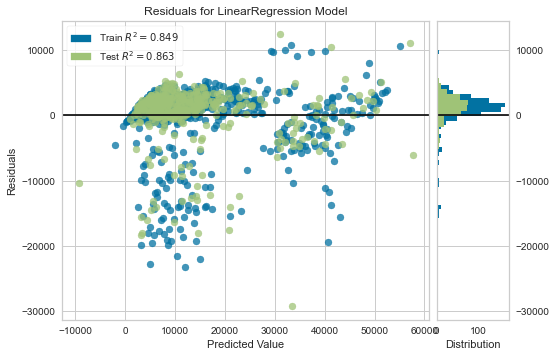

In [34]:
plot_model(lr)

In [35]:
save_model(lr, 'deployment_lr_08012020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              random_state=123, subclass='binary',
                              target='charges',
         

In [46]:
deployment_lr_08012020 = load_model('deployment_lr_08012020')

Transformation Pipeline and Model Successfully Loaded


In [47]:
deployment_lr_08012020

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs',
                 DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                             random_state=123, subclass='binary',
                             target='charges',
                          

In [48]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75714.0
